In [1]:
from config import *
from map_wrapper import *

In [2]:
print(f'{year}年{month}月')

2019年12月


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=conn)
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']




In [5]:

join_counts=[conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]]
percents=[]
for i in range(1,month-6+1):
    sql=f"select COUNT(1) from _{year}{month:02} a join _{year}{month-i:02} b on a.job_id = b.job_id"
    #print(sql)
    count=conn.execute(sql).fetchall()[0][0]

    join_counts.append(count)
    subtract = join_counts[i-1]-join_counts[i]
    percents.append(subtract*1.0/join_counts[i])

percents.append(join_counts[-1]/join_counts[0])

In [6]:
join_counts

[88893, 73910, 63102, 55424, 47933, 41292, 37244]

In [7]:
percents

[0.2027195237450954,
 0.17127824791607238,
 0.1385320438799076,
 0.15628064172908018,
 0.16083018502373342,
 0.10868864783589303,
 0.41897562237746505]

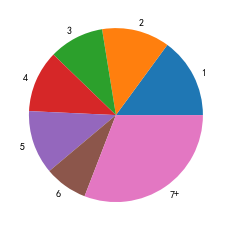

In [8]:
plt.pie(percents, labels=['1','2','3','4','5','6','7+'])
plt.show()

In [9]:
data.shape[0]

84141

In [10]:
conn.close()

In [11]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [12]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,22323,5250,20500,50000,8798,3.18%
0,算法工程师,18240,5000,16000,45000,24477,8.84%
1,一般程序员,12770,3750,12000,30000,243227,87.84%
3,爬虫工程师,11045,5250,10500,23562,369,0.13%
4,生物信息工程师,10771,7000,10750,15000,35,0.01%


# 程序员工资

In [13]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17947,3750,15000,45000,24560,8.87%
上海,16390,5250,15000,37500,44024,15.90%
广东,14778,4500,12500,35000,71178,25.70%
浙江,13851,3250,12500,30000,17207,6.21%
四川,12209,2500,11500,30000,12129,4.38%
江苏,11973,3750,11500,27000,28902,10.44%
湖北,11679,3750,10500,26000,15067,5.44%
湖南,11320,3750,10500,25000,6095,2.20%
陕西,11267,3750,10416,27500,6966,2.52%
重庆,11167,4000,10000,25000,3802,1.37%


In [14]:
describe(data_city,'程序员')

2019年12月北京招收程序员24560人。2019年12月北京程序员平均工资17947元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年12月上海招收程序员44024人。2019年12月上海程序员平均工资16390元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年12月广东招收程序员71178人。2019年12月广东程序员平均工资14778元，工资中位数12500元，其中95%的人的工资介于4500元到35000元。

2019年12月浙江招收程序员17207人。2019年12月浙江程序员平均工资13851元，工资中位数12500元，其中95%的人的工资介于3250元到30000元。

2019年12月四川招收程序员12129人。2019年12月四川程序员平均工资12209元，工资中位数11500元，其中95%的人的工资介于2500元到30000元。

2019年12月江苏招收程序员28902人。2019年12月江苏程序员平均工资11973元，工资中位数11500元，其中95%的人的工资介于3750元到27000元。

2019年12月湖北招收程序员15067人。2019年12月湖北程序员平均工资11679元，工资中位数10500元，其中95%的人的工资介于3750元到26000元。

2019年12月湖南招收程序员6095人。2019年12月湖南程序员平均工资11320元，工资中位数10500元，其中95%的人的工资介于3750元到25000元。

2019年12月陕西招收程序员6966人。2019年12月陕西程序员平均工资11267元，工资中位数10416元，其中95%的人的工资介于3750元到27500元。

2019年12月重庆招收程序员3802人。2019年12月重庆程序员平均工资11167元，工资中位数10000元，其中95%的人的工资介于4000元到25000元。

2019年12月天津招收程序员2274人。2019年12月天津程序员平均工资10752元，工资中位数9200元，其中95%的人的工资介于3750元到22500元。

2019年12月辽宁招收程序员12819人。2019年12月辽宁程序员平均工资10622元，工资中位数9000元，其中95%的人的工资介于2

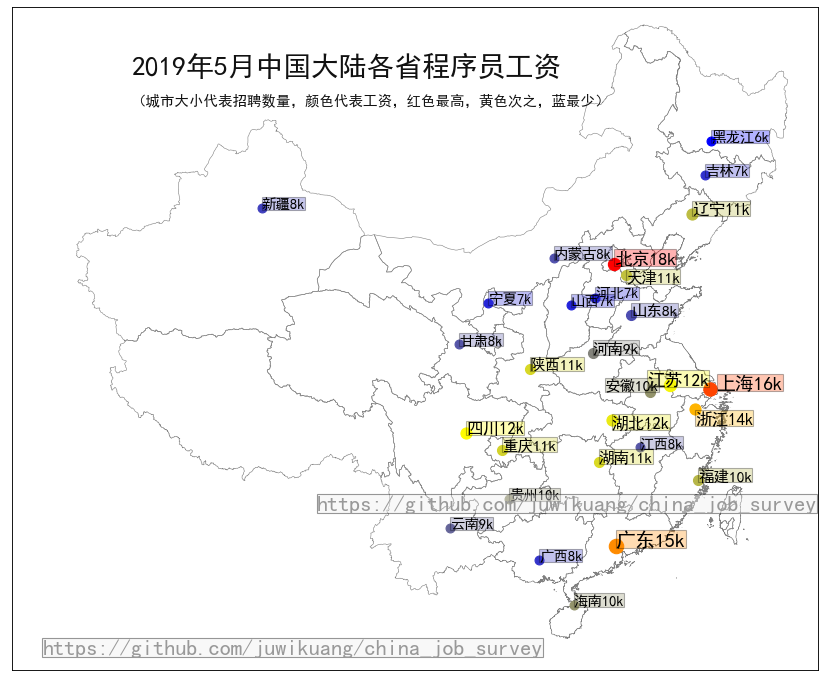

In [16]:
draw_province_map(data_city,2000,'2019年5月中国大陆各省程序员工资')

# 算法工程师

In [17]:
describe(get_sub_stats_by_col(data[data.career=='算法工程师'],'province'), '算法工程师')

2019年12月北京招收算法工程师3151人。2019年12月北京算法工程师平均工资22211元，工资中位数20000元，其中95%的人的工资介于5000元到50906元。

2019年12月上海招收算法工程师4567人。2019年12月上海算法工程师平均工资21748元，工资中位数20000元，其中95%的人的工资介于6768元到45000元。

2019年12月广东招收算法工程师6702人。2019年12月广东算法工程师平均工资18896元，工资中位数17500元，其中95%的人的工资介于5000元到40000元。

2019年12月浙江招收算法工程师1680人。2019年12月浙江算法工程师平均工资17707元，工资中位数16000元，其中95%的人的工资介于3750元到41250元。

2019年12月江苏招收算法工程师2793人。2019年12月江苏算法工程师平均工资16194元，工资中位数15000元，其中95%的人的工资介于5250元到35000元。

2019年12月海南招收算法工程师18人。2019年12月海南算法工程师平均工资15417元，工资中位数15000元，其中95%的人的工资介于12500元到22500元。

2019年12月湖北招收算法工程师1173人。2019年12月湖北算法工程师平均工资15233元，工资中位数15000元，其中95%的人的工资介于4000元到27500元。

2019年12月四川招收算法工程师1079人。2019年12月四川算法工程师平均工资15025元，工资中位数13500元，其中95%的人的工资介于5250元到31250元。

2019年12月陕西招收算法工程师645人。2019年12月陕西算法工程师平均工资14444元，工资中位数12953元，其中95%的人的工资介于5250元到34187元。

2019年12月安徽招收算法工程师283人。2019年12月安徽算法工程师平均工资14438元，工资中位数12500元，其中95%的人的工资介于6234元到33208元。

2019年12月天津招收算法工程师181人。2019年12月天津算法工程师平均工资14278元，工资中位数13885元，其中95%的人的工资介于7350元到22500元。

2019年12月湖南招收算法工程师493人。2019年12月湖南算法工程

In [18]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'province')

data_city_algorithm.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,22211,5000,20000,50906,3151,12.87%
上海,21748,6768,20000,45000,4567,18.66%
广东,18896,5000,17500,40000,6702,27.38%
浙江,17707,3750,16000,41250,1680,6.86%
江苏,16194,5250,15000,35000,2793,11.41%
海南,15417,12500,15000,22500,18,0.07%
湖北,15233,4000,15000,27500,1173,4.79%
四川,15025,5250,13500,31250,1079,4.41%
陕西,14444,5250,12953,34187,645,2.64%
安徽,14438,6234,12500,33208,283,1.16%


In [19]:
describe(data_city_algorithm,'算法工程师')

2019年12月北京招收算法工程师3151人。2019年12月北京算法工程师平均工资22211元，工资中位数20000元，其中95%的人的工资介于5000元到50906元。

2019年12月上海招收算法工程师4567人。2019年12月上海算法工程师平均工资21748元，工资中位数20000元，其中95%的人的工资介于6768元到45000元。

2019年12月广东招收算法工程师6702人。2019年12月广东算法工程师平均工资18896元，工资中位数17500元，其中95%的人的工资介于5000元到40000元。

2019年12月浙江招收算法工程师1680人。2019年12月浙江算法工程师平均工资17707元，工资中位数16000元，其中95%的人的工资介于3750元到41250元。

2019年12月江苏招收算法工程师2793人。2019年12月江苏算法工程师平均工资16194元，工资中位数15000元，其中95%的人的工资介于5250元到35000元。

2019年12月海南招收算法工程师18人。2019年12月海南算法工程师平均工资15417元，工资中位数15000元，其中95%的人的工资介于12500元到22500元。

2019年12月湖北招收算法工程师1173人。2019年12月湖北算法工程师平均工资15233元，工资中位数15000元，其中95%的人的工资介于4000元到27500元。

2019年12月四川招收算法工程师1079人。2019年12月四川算法工程师平均工资15025元，工资中位数13500元，其中95%的人的工资介于5250元到31250元。

2019年12月陕西招收算法工程师645人。2019年12月陕西算法工程师平均工资14444元，工资中位数12953元，其中95%的人的工资介于5250元到34187元。

2019年12月安徽招收算法工程师283人。2019年12月安徽算法工程师平均工资14438元，工资中位数12500元，其中95%的人的工资介于6234元到33208元。

2019年12月天津招收算法工程师181人。2019年12月天津算法工程师平均工资14278元，工资中位数13885元，其中95%的人的工资介于7350元到22500元。

2019年12月湖南招收算法工程师493人。2019年12月湖南算法工程

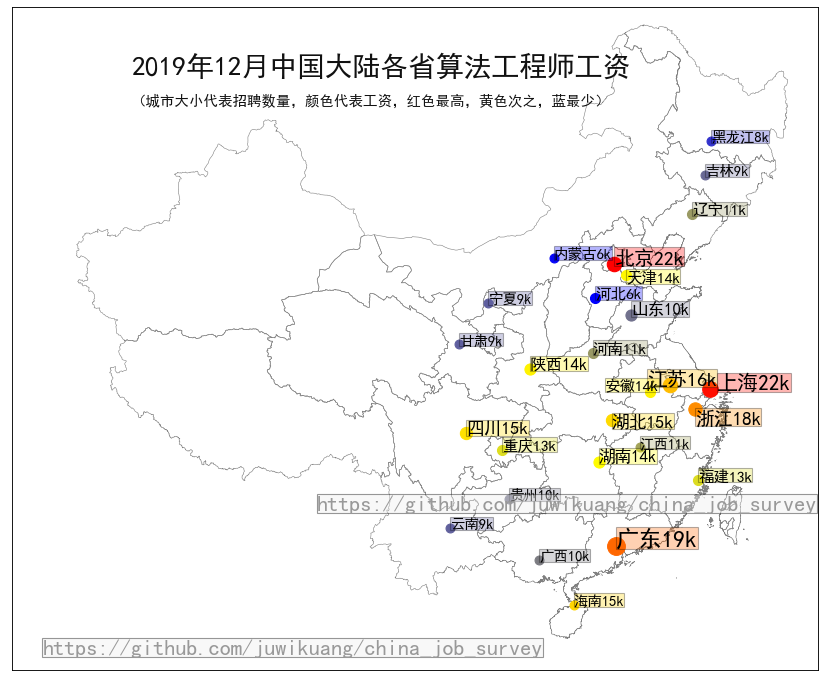

In [20]:
draw_province_map(data_city_algorithm,100,f'2019年{month}月中国大陆各省算法工程师工资')

# 系统架构师

In [22]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'province')

data_city_architect.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
河北,32409,6500,32500,75000,11,0.13%
北京,31990,8975,32500,55000,1179,13.40%
浙江,23273,7000,23361,45000,570,6.48%
广东,22939,5250,22500,46883,2588,29.42%
上海,22927,7000,22500,50000,1798,20.44%
四川,19093,7532,18500,38188,329,3.74%
江苏,18214,5250,17500,36718,825,9.38%
河南,17357,6500,18333,30000,14,0.16%
湖南,17311,9533,17500,33127,132,1.50%
湖北,16913,5822,16167,30000,421,4.79%


In [23]:
describe(data_city_architect,'系统架构师')

2019年12月河北招收系统架构师11人。2019年12月河北系统架构师平均工资32409元，工资中位数32500元，其中95%的人的工资介于6500元到75000元。

2019年12月北京招收系统架构师1179人。2019年12月北京系统架构师平均工资31990元，工资中位数32500元，其中95%的人的工资介于8975元到55000元。

2019年12月浙江招收系统架构师570人。2019年12月浙江系统架构师平均工资23273元，工资中位数23361元，其中95%的人的工资介于7000元到45000元。

2019年12月广东招收系统架构师2588人。2019年12月广东系统架构师平均工资22939元，工资中位数22500元，其中95%的人的工资介于5250元到46883元。

2019年12月上海招收系统架构师1798人。2019年12月上海系统架构师平均工资22927元，工资中位数22500元，其中95%的人的工资介于7000元到50000元。

2019年12月四川招收系统架构师329人。2019年12月四川系统架构师平均工资19093元，工资中位数18500元，其中95%的人的工资介于7532元到38188元。

2019年12月江苏招收系统架构师825人。2019年12月江苏系统架构师平均工资18214元，工资中位数17500元，其中95%的人的工资介于5250元到36718元。

2019年12月河南招收系统架构师14人。2019年12月河南系统架构师平均工资17357元，工资中位数18333元，其中95%的人的工资介于6500元到30000元。

2019年12月湖南招收系统架构师132人。2019年12月湖南系统架构师平均工资17311元，工资中位数17500元，其中95%的人的工资介于9533元到33127元。

2019年12月湖北招收系统架构师421人。2019年12月湖北系统架构师平均工资16913元，工资中位数16167元，其中95%的人的工资介于5822元到30000元。

2019年12月陕西招收系统架构师209人。2019年12月陕西系统架构师平均工资16481元，工资中位数17500元，其中95%的人的工资介于1750元到40458元。

2019年12月贵州招收系统架构师2人。2019年12月贵州系统架构师平均工资160

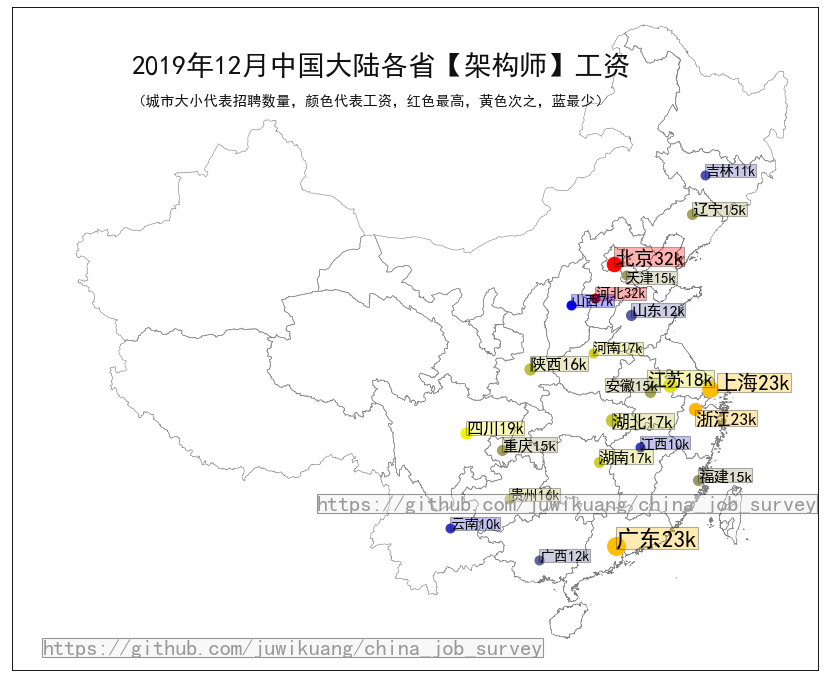

In [24]:
draw_province_map(data_city_architect,40,f'2019年{month}月中国大陆各省【架构师】工资')

# 生物信息工程师

In [26]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'province')
#data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,14286,12500,14167,15000,7,20.00%
广东,10567,7000,10100,15000,15,42.86%
江苏,9875,9000,9875,12500,4,11.43%
上海,9800,8000,9800,12500,5,14.29%
湖北,9000,9000,9000,9000,1,2.86%
广西,7000,7000,7000,7000,3,8.57%


In [27]:
describe(data_bio,'生物信息工程师')

2019年12月北京招收生物信息工程师7人。2019年12月北京生物信息工程师平均工资14286元，工资中位数14167元，其中95%的人的工资介于12500元到15000元。

2019年12月广东招收生物信息工程师15人。2019年12月广东生物信息工程师平均工资10567元，工资中位数10100元，其中95%的人的工资介于7000元到15000元。

2019年12月江苏招收生物信息工程师4人。2019年12月江苏生物信息工程师平均工资9875元，工资中位数9875元，其中95%的人的工资介于9000元到12500元。

2019年12月上海招收生物信息工程师5人。2019年12月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2019年12月湖北招收生物信息工程师1人。2019年12月湖北生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年12月广西招收生物信息工程师3人。2019年12月广西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。



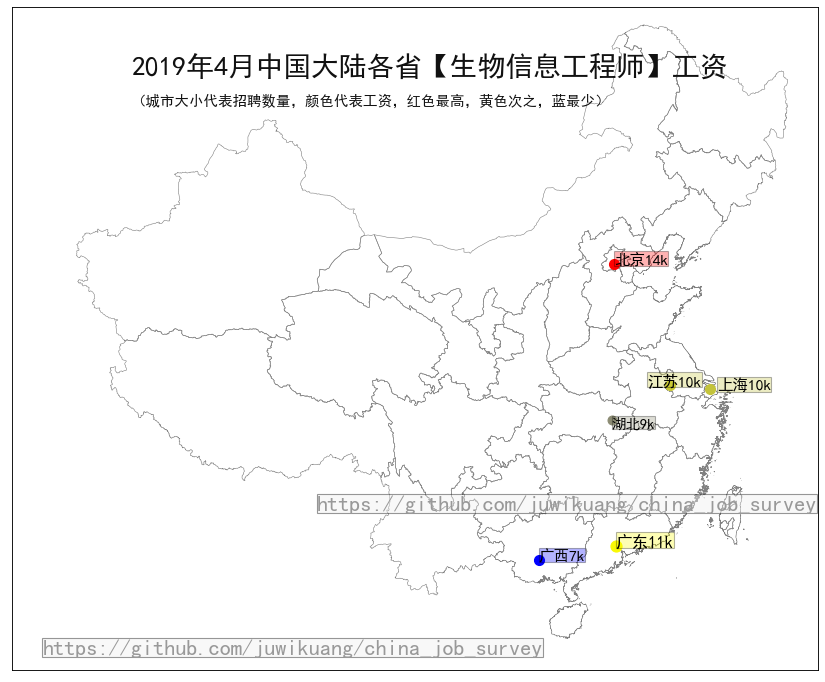

In [28]:
draw_province_map(data_bio,2,'2019年4月中国大陆各省【生物信息工程师】工资')

# 爬虫工程师

In [30]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'province')


data_spider=data_spider[data_spider.head_count>10]
data_spider.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,15300,1750,16250,34375,25,6.78%
上海,13219,4838,12500,29562,98,26.56%
湖北,12591,7000,11833,20000,11,2.98%
江苏,11700,9000,12500,15500,15,4.07%
广东,11565,5250,11400,20500,85,23.04%
湖南,9474,7000,9200,12500,19,5.15%
四川,7184,6000,6250,14125,38,10.30%
安徽,6957,6025,7000,7000,23,6.23%
陕西,6083,5250,6250,6250,12,3.25%


In [31]:
describe(data_spider, '爬虫工程师')

2019年12月北京招收爬虫工程师25人。2019年12月北京爬虫工程师平均工资15300元，工资中位数16250元，其中95%的人的工资介于1750元到34375元。

2019年12月上海招收爬虫工程师98人。2019年12月上海爬虫工程师平均工资13219元，工资中位数12500元，其中95%的人的工资介于4838元到29562元。

2019年12月湖北招收爬虫工程师11人。2019年12月湖北爬虫工程师平均工资12591元，工资中位数11833元，其中95%的人的工资介于7000元到20000元。

2019年12月江苏招收爬虫工程师15人。2019年12月江苏爬虫工程师平均工资11700元，工资中位数12500元，其中95%的人的工资介于9000元到15500元。

2019年12月广东招收爬虫工程师85人。2019年12月广东爬虫工程师平均工资11565元，工资中位数11400元，其中95%的人的工资介于5250元到20500元。

2019年12月湖南招收爬虫工程师19人。2019年12月湖南爬虫工程师平均工资9474元，工资中位数9200元，其中95%的人的工资介于7000元到12500元。

2019年12月四川招收爬虫工程师38人。2019年12月四川爬虫工程师平均工资7184元，工资中位数6250元，其中95%的人的工资介于6000元到14125元。

2019年12月安徽招收爬虫工程师23人。2019年12月安徽爬虫工程师平均工资6957元，工资中位数7000元，其中95%的人的工资介于6025元到7000元。

2019年12月陕西招收爬虫工程师12人。2019年12月陕西爬虫工程师平均工资6083元，工资中位数6250元，其中95%的人的工资介于5250元到6250元。



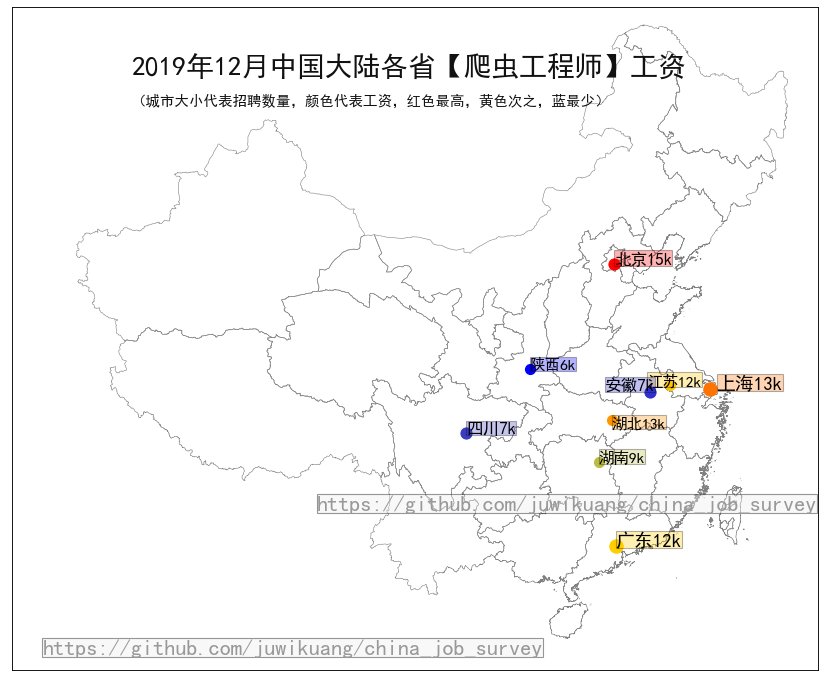

In [32]:
draw_province_map(data_spider,5,f'2019年{month}月中国大陆各省【爬虫工程师】工资')

# Java程序员

In [35]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'province')
data_java.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17025,3750,15000,40000,11849,9.41%
上海,16467,5250,15000,36268,19131,15.20%
广东,14855,4783,13000,32500,31733,25.21%
浙江,13912,3486,12500,30000,7930,6.30%
江苏,11779,3750,11000,26500,13237,10.52%
四川,11652,2500,11000,25000,4827,3.83%
湖北,11501,3750,10500,26000,5794,4.60%
辽宁,11128,2500,9000,30000,6941,5.51%
陕西,10974,2843,10000,23427,3016,2.40%
湖南,10871,3750,10500,21371,2807,2.23%


In [36]:
describe(data_java, 'Java程序员')

2019年12月北京招收Java程序员11849人。2019年12月北京Java程序员平均工资17025元，工资中位数15000元，其中95%的人的工资介于3750元到40000元。

2019年12月上海招收Java程序员19131人。2019年12月上海Java程序员平均工资16467元，工资中位数15000元，其中95%的人的工资介于5250元到36268元。

2019年12月广东招收Java程序员31733人。2019年12月广东Java程序员平均工资14855元，工资中位数13000元，其中95%的人的工资介于4783元到32500元。

2019年12月浙江招收Java程序员7930人。2019年12月浙江Java程序员平均工资13912元，工资中位数12500元，其中95%的人的工资介于3486元到30000元。

2019年12月江苏招收Java程序员13237人。2019年12月江苏Java程序员平均工资11779元，工资中位数11000元，其中95%的人的工资介于3750元到26500元。

2019年12月四川招收Java程序员4827人。2019年12月四川Java程序员平均工资11652元，工资中位数11000元，其中95%的人的工资介于2500元到25000元。

2019年12月湖北招收Java程序员5794人。2019年12月湖北Java程序员平均工资11501元，工资中位数10500元，其中95%的人的工资介于3750元到26000元。

2019年12月辽宁招收Java程序员6941人。2019年12月辽宁Java程序员平均工资11128元，工资中位数9000元，其中95%的人的工资介于2500元到30000元。

2019年12月陕西招收Java程序员3016人。2019年12月陕西Java程序员平均工资10974元，工资中位数10000元，其中95%的人的工资介于2843元到23427元。

2019年12月湖南招收Java程序员2807人。2019年12月湖南Java程序员平均工资10871元，工资中位数10500元，其中95%的人的工资介于3750元到21371元。

2019年12月重庆招收Java程序员1745人。2019年12月重庆Java程序员平均工资10856元，工资中位数10000元，其中95%的人的工资介于

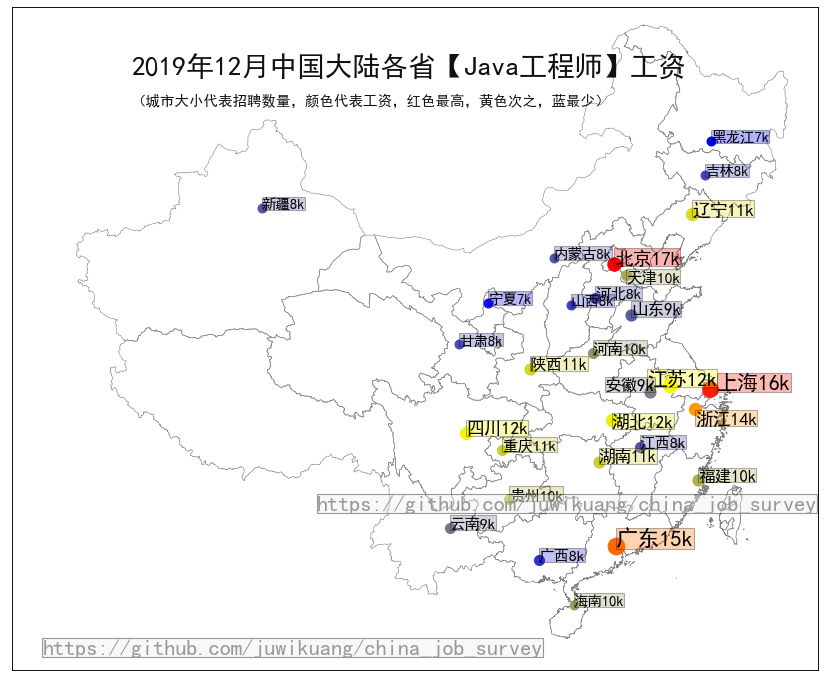

In [37]:
draw_province_map(data_java, 500, f'2019年{month}月中国大陆各省【Java工程师】工资')

# Python程序员

In [38]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'province')
data_python.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,23111,3750,20785,58333,4238,14.21%
上海,20586,6250,18500,45000,5898,19.78%
广东,17948,4500,16000,40000,7330,24.58%
浙江,16150,3750,15000,35000,1802,6.04%
四川,15561,3767,14500,33150,1508,5.06%
湖北,14844,5000,13000,35000,1287,4.32%
江苏,14419,5250,12500,32500,3110,10.43%
重庆,14039,3482,12500,35000,365,1.22%
陕西,13289,3619,12500,35000,715,2.40%
湖南,13216,3936,12500,32021,583,1.95%


In [42]:
#describe(data_python, 'Python程序员')

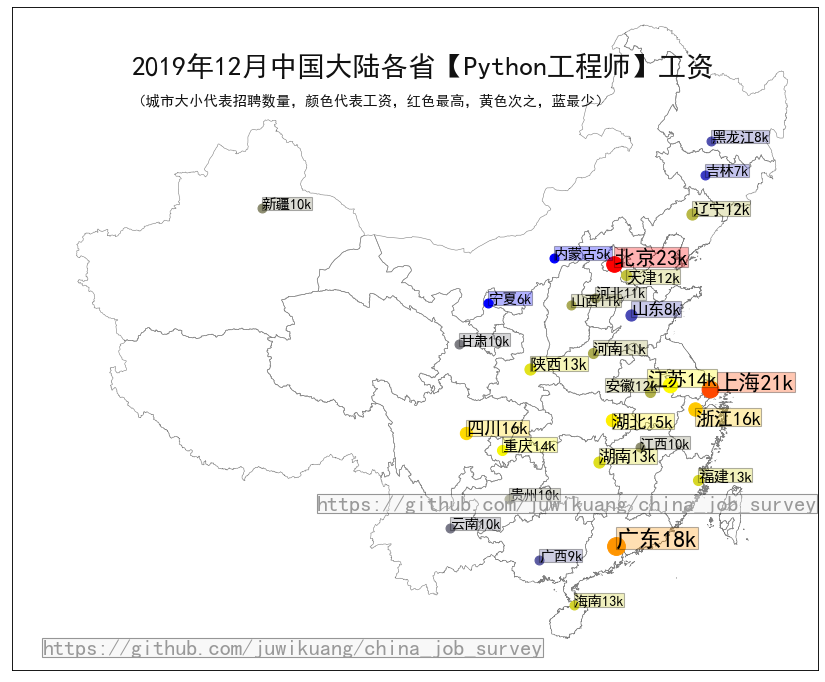

In [41]:
draw_province_map(data_python, 100,  f'{year}年{month}月中国大陆各省【Python工程师】工资')